In [30]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp



# Define the function
def LCOV(X, U):
    # Compute the inverse of U
    Ui = np.linalg.inv(U)
    # Compute Y = U^-1 * X
    Y = np.dot(Ui, X)
    return Y
X = np.array([[0], [0]])  # Column vector
U = (1/np.sqrt(2)) * np.array([[1, 1], [1j, -1j]])  # Square matrix
# Compute Y
Y = LCOV(X, U)

# Define the h3(z) function
def h3(z, h30, h21, h12, h03):
    z1, z2 = z
    h3_z1 = h130 * z1**3 + h121 * z1**2 * z2 + h112 * z1 * z2**2 + h103 * z2**3
    h3_z2 = h230 * z2**3 + h221 * z1**2 * z2 + h212 * z1 * z2**2 + h203 * z1**3
    return np.array([h3_z1, h3_z2])

# Define the system to solve y = z + h3(z)
def system(z, y, h30, h21, h12, h03):
    return z + h3(z, h30, h21, h12, h03) - y    ####  Residual of the system F(z) = z + h3(z) - y.

# Example coefficients for h3(z)
h130, h112, h121, h103 = -1/48,0, 1/16, 1/96
h230, h212, h221, h203 = 1/96,1/16, 0, -1/48


# Example input vector y = [y1, y2]
y = np.array([0.5, 0.5])

# Initial guess for z (start with y as an initial guess)
z0 = y

# Solve for z using fsolve
z_solution = fsolve(system, z0, args=(y, h30, h21, h12, h03))

# Print the results
print("Input vector y =", y)
print("Solution vector z =", z_solution)

# Validate: Compute y back using z + h3(z)
y_computed = z_solution + h3(z_solution, h30, h21, h12, h03)
print("Computed y =", y_computed)

In [33]:
import numpy as np
from scipy.optimize import fsolve

# Define the function
def LCOV(X, U):
    # Compute the inverse of U
    Ui = np.linalg.inv(U)
    # Compute Y = U^-1 * X
    Y = np.dot(Ui, X)
    return Y

# Example usage
X = np.array([[0], [0]])  # Column vector
U = (1/np.sqrt(2)) * np.array([[1, 1], [1j, -1j]])  # Square matrix
# Compute Y
Y = LCOV(X, U)

In [41]:
def h3(z, h30, h21, h12, h03):
    z1, z2 = z
    h3_z1 = h130 * z1**3 + h121 * z1**2 * z2 + h112 * z1 * z2**2 + h103 * z2**3
    h3_z2 = h230 * z2**3 + h221 * z1**2 * z2 + h212 * z1 * z2**2 + h203 * z1**3
    return np.array([h3_z1, h3_z2])

In [42]:
h3(z, h30, h21, h12, h03)

NameError: name 'z' is not defined

In [1]:
import numpy as np
from scipy.optimize import fsolve

# Define the h3(z) function with distinct coefficients for h3_z1 and h3_z2
def h3(z, h_coeffs):
    z1, z2 = z
    h3_z1 = (
        h_coeffs['h130'] * z1**3 +
        h_coeffs['h112'] * z1**2 * z2 +
        h_coeffs['h121'] * z1 * z2**2 +
        h_coeffs['h103'] * z2**3
    )
    h3_z2 = (
        h_coeffs['h230'] * z1**3 +
        h_coeffs['h212'] * z1**2 * z2 +
        h_coeffs['h221'] * z1 * z2**2 +
        h_coeffs['h203'] * z2**3
    )
    return np.array([h3_z1, h3_z2])

# Define the system to solve y = z + h3(z)
def system(z, y, h_coeffs):
    
    return z + h3(z, h_coeffs) - y

# Define the coefficients for h3(z)
h_coeffs = {
    'h130': -1/48, 'h112': 0,     'h121': 1/16,  'h103': 1/96,  # For z1
    'h230': 1/96,  'h212': 1/16,  'h221': 0,     'h203': -1/48  # For z2
}

# input vector y = [y1, y2]
y = np.array([0.5, 0.5])

# Initial guess for z (start with y as an initial guess)
z0 = y

# Solve for z using fsolve
z_solution = fsolve(system, z0, args=(y, h_coeffs))

# Print the results
print("Input vector y =", y)
print("Solution vector z =", z_solution)

# Validate: Compute y back using z + h3(z)
y_computed = z_solution + h3(z_solution, h_coeffs)
print("Computed y =", y_computed)


Input vector y = [0.5 0.5]
Solution vector z = [0.49373139 0.49373139]
Computed y = [0.5 0.5]


In [43]:
import numpy as np
from scipy.optimize import fsolve

# Define the LCOV function to compute y = U^-1 * X
def LCOV(X, U):
    Ui = np.linalg.inv(U)
    return np.dot(Ui, X)  # Returns y as a column vector (2D)

# Define the h3(z) function
def h3(z, h_coeffs):
    z1, z2 = z  # 1D input for fsolve
    h3_z1 = (
        h_coeffs['h130'] * z1**3 +
        h_coeffs['h112'] * z1**2 * z2 +
        h_coeffs['h121'] * z1 * z2**2 +
        h_coeffs['h103'] * z2**3
    )
    h3_z2 = (
        h_coeffs['h230'] * z1**3 +
        h_coeffs['h212'] * z1**2 * z2 +
        h_coeffs['h221'] * z1 * z2**2 +
        h_coeffs['h203'] * z2**3
    )
    return np.array([h3_z1, h3_z2])  # 1D output for fsolve

# Define the system  y = z + h3(z)
def system(z, y, h_coeffs):
    return z + h3(z, h_coeffs) - y.flatten()  # y must be 1D for fsolve

# Coefficients for h3(z)
h_coeffs = {
    'h130': -1/48, 'h112': 0,     'h121': 1/16,  'h103': 1/96,
    'h230': 1/96,  'h212': 1/16,  'h221': 0,     'h203': -1/48
}

# Compute y as a column vector (2D) from LCOV
X = np.array([[0], [0]])  # Column vector
U = (1/np.sqrt(2)) * np.array([[1, 1], [1j, -1j]])
y = LCOV(X, U)  # y is a column vector (2D)

# Solve for z using fsolve (requires 1D input/output)
z0 = y.flatten()  # Flatten for compatibility
z_solution = fsolve(system, z0, args=(y, h_coeffs))

# validation y from z
y_computed = z_solution + h3(z_solution, h_coeffs)

# Display results
print("Input vector y (column vector):\n", y)
print("Solution vector z (1D):", z_solution)
print("Validated y (column vector):\n", y_computed.reshape(-1, 1))


TypeError: Cannot cast array data from dtype('complex128') to dtype('float64') according to the rule 'safe'

In [47]:
h_coeffs = {
    'h130': -1/48, 'h112': 0,     'h121': 1/16,  'h103': 1/96,
    'h230': 1/96,  'h212': 1/16,  'h221': 0,     'h203': -1/48
}

In [48]:
# Define the h3(z) function
def h3(z, h_coeffs):
    z1, z2 = z  # 1D input for fsolve
    h3_z1 = (
        h_coeffs['h130'] * z1**3 +
        h_coeffs['h112'] * z1**2 * z2 +
        h_coeffs['h121'] * z1 * z2**2 +
        h_coeffs['h103'] * z2**3
    )
    h3_z2 = (
        h_coeffs['h230'] * z1**3 +
        h_coeffs['h212'] * z1**2 * z2 +
        h_coeffs['h221'] * z1 * z2**2 +
        h_coeffs['h203'] * z2**3
    )
    return np.array([h3_z1, h3_z2])  # 1D output for fsolve

In [2]:
##### main started ######

import numpy as np
from scipy.optimize import fsolve

# Define the LCOV function to compute y = U^-1 * X
def LCOV(X, U):
    Ui = np.linalg.inv(U)
    return np.dot(Ui, X)  # Returns y as a column vector (2D)

# Define the h3(z) function
def h3(z, h_coeffs):
    z1, z2 = z  # 1D input for fsolve
    h3_z1 = (
        h_coeffs['h130'] * z1**3 +
        h_coeffs['h112'] * z1**2 * z2 +
        h_coeffs['h121'] * z1 * z2**2 +
        h_coeffs['h103'] * z2**3
    )
    h3_z2 = (
        h_coeffs['h230'] * z1**3 +
        h_coeffs['h212'] * z1**2 * z2 +
        h_coeffs['h221'] * z1 * z2**2 +
        h_coeffs['h203'] * z2**3
    )
    return np.array([h3_z1, h3_z2])  # 1D output for fsolve

# Define the system  y = z + h3(z)
def system(z, y, h_coeffs):
    return z + h3(z, h_coeffs) - y.flatten()  # y must be 1D for fsolve

# Coefficients for h3(z)
h_coeffs = {
    'h130': -1/48, 'h112': 0,     'h121': 1/16,  'h103': 1/96,
    'h230': 1/96,  'h212': 1/16,  'h221': 0,     'h203': -1/48
}

# Compute y as a column vector (2D) from LCOV
X = np.array([[0], [0]])  # Column vector
U = (1/np.sqrt(2)) * np.array([[1, 1], [1j, -1j]])
y = LCOV(X, U)  # y is a column vector (2D)

# Solve for z using fsolve (requires 1D input/output)
z0 = y.flatten()  # Flatten for compatibility
z_solution = fsolve(system, z0, args=(y, h_coeffs))

# validation y from z
y_computed = z_solution + h3(z_solution, h_coeffs)

# Display results
print("Input vector y (column vector):\n", y)
print("Solution vector z (1D):", z_solution)
print("Validated y (column vector):\n", y_computed.reshape(-1, 1))


TypeError: Cannot cast array data from dtype('complex128') to dtype('float64') according to the rule 'safe'

In [6]:
import numpy as np
from scipy.optimize import fsolve

# Define the LCOV function to compute y = U^-1 * X
def LCOV(X, U):
    Ui = np.linalg.inv(U)
    return np.dot(Ui, X)

# Define the h3(z) function
def h3(z, h_coeffs):
    z1, z2 = z  # 1D input for fsolve
    h3_z1 = (
        h_coeffs['h130'] * z1**3 +
        h_coeffs['h112'] * z1**2 * z2 +
        h_coeffs['h121'] * z1 * z2**2 +
        h_coeffs['h103'] * z2**3
    )
    h3_z2 = (
        h_coeffs['h230'] * z1**3 +
        h_coeffs['h212'] * z1**2 * z2 +
        h_coeffs['h221'] * z1 * z2**2 +
        h_coeffs['h203'] * z2**3
    )
    return np.array([h3_z1, h3_z2])  # 1D output for fsolve

# Define the system y = z + h3(z)
def system(z_real_imag, y_real_imag, h_coeffs):
    # Reconstruct z as complex numbers
    z = z_real_imag[:2] + 1j * z_real_imag[2:]
    y = y_real_imag[:2] + 1j * y_real_imag[2:]

    # Compute the system in terms of real and imaginary parts
    result = z + h3(z, h_coeffs) - y
    return np.concatenate([result.real, result.imag])  # Return real and imaginary parts as 1D real array

# Coefficients for h3(z)
h_coeffs = {
    'h130': -1/48, 'h112': 0,
    'h121': 1/16,  'h103': 1/96,
    'h230': 1/96,  'h212': 1/16,  'h221': 0,
    'h203': -1/48
}

# Compute y as a column vector (2D) from LCOV
X = np.array([[0], [0]])  # Column vector
U = (1/np.sqrt(2)) * np.array([[1, 1], [1j, -1j]])
y = LCOV(X, U)  # y is a column vector (complex)

# Flatten y into real and imaginary parts for fsolve
y_real_imag = np.concatenate([y.real.flatten(), y.imag.flatten()])

# Initial guess for z (real and imaginary parts)
z0 = y_real_imag  # Start with real and imaginary parts of y

# Solve for z using fsolve
z_solution_real_imag = fsolve(system, z0, args=(y_real_imag, h_coeffs))

# Reconstruct the complex solution for z
z_solution = z_solution_real_imag[:2] + 1j * z_solution_real_imag[2:]

# Validation: Compute y from z
y_computed = z_solution + h3(z_solution, h_coeffs)

# Display results
print("Input vector y (column vector):\n", y)
print("Solution vector z (complex):", z_solution)
print("Validated y (column vector):\n", y_computed.reshape(-1, 1))




Input vector y (column vector):
 [[0.+0.j]
 [0.+0.j]]
Solution vector z (complex): [0.+0.j 0.+0.j]
Validated y (column vector):
 [[0.+0.j]
 [0.+0.j]]


In [10]:
def compute_z_dot(z_solution):
    z_1, z_2 = z_solution  # Extract z1 and z2 from the solution
    
    # Compute z1_dot and z2_dot
    dz1_dt = 1j * z1 - h3_z1
    dz2_dot = -1j * z2 + h3_z2
    
    return np.array([dz1_dot,dz2_dot])

# Initial conditions
state = [z_1,z2]  # Initial state

# Time span for the simulation
t_span = (0, 10)  # From t=0 to t=10 seconds
t_eval = np.linspace(0, 10, 1000)  # Time points at which to store the result

# Solve the system using solve_ivp (Runge-Kutta method)
sol = solve_ivp(compute_z_dot, t_span, state, t_eval=t_eval)
# Plot the results
""""plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='Theta (angle)')
plt.plot(sol.t, sol.y[1], label='Omega (angular velocity)')
plt.xlabel('Time (s)')
plt.ylabel('State (angle and velocity)')
plt.title('Linearized Pendulum Dynamics (Small-Angle Approximation sin0=0)')
plt.legend()
plt.grid()
plt.show() """

NameError: name 'z_1' is not defined

In [5]:
import numpy as np
from scipy.optimize import fsolve

# Define the LCOV function to compute y = U^-1 * X
def LCOV(X, U):
    Ui = np.linalg.inv(U)
    return np.dot(Ui, X)

# Define the h3(z) function
def h3(z, h_coeffs):
    z1, z2 = z  # 1D input for fsolve
    h3_z1 = (
        h_coeffs['h130'] * z1**3 +
        h_coeffs['h112'] * z1**2 * z2 +
        h_coeffs['h121'] * z1 * z2**2 +
        h_coeffs['h103'] * z2**3
    )
    h3_z2 = (
        h_coeffs['h230'] * z1**3 +
        h_coeffs['h212'] * z1**2 * z2 +
        h_coeffs['h221'] * z1 * z2**2 +
        h_coeffs['h203'] * z2**3
    )
    return np.array([h3_z1, h3_z2])  # 1D output for fsolve

# Define the system y = z + h3(z)
def system(z_real_imag, y_real_imag, h_coeffs):
    # Reconstruct z as complex numbers
    z = z_real_imag[:2] + 1j * z_real_imag[2:]
    y = y_real_imag[:2] + 1j * y_real_imag[2:]

    # Compute the system in terms of real and imaginary parts
    result = z + h3(z, h_coeffs) - y
    return np.concatenate([result.real, result.imag])  # Return real and imaginary parts as 1D real array

# Define the equations for z1_dot and z2_dot
def compute_z_dot(z):
    z1, z2 = z  # Extract z1 and z2 from the solution
    
    # Compute z1_dot and z2_dot
    z1_dot = 1j * z1 - (1j / 8) * z1**2 * z2
    z2_dot = -1j * z2 + (1j / 8) * z1 * z2**2
    
    return np.array([z1_dot, z2_dot])

# Coefficients for h3(z)
h_coeffs = {
    'h130': -1/48, 'h112': 0,
    'h121': 1/16,  'h103': 1/96,
    'h230': 1/96,  'h212': 1/16,  'h221': 0,
    'h203': -1/48
}

# Compute y as a column vector (2D) from LCOV
X = np.array([[0], [0]])  # Column vector
U = (1/np.sqrt(2)) * np.array([[1, 1], [1j, -1j]])
y = LCOV(X, U)  # y is a column vector (complex)

# Flatten y into real and imaginary parts for fsolve
y_real_imag = np.concatenate([y.real.flatten(), y.imag.flatten()])

# Initial guess for z (real and imaginary parts)
z0 = y_real_imag  # Start with real and imaginary parts of y

# Solve for z using fsolve
z_solution_real_imag = fsolve(system, z0, args=(y_real_imag, h_coeffs))

# Reconstruct the complex solution for z  from here we got z0 
z_solution = z_solution_real_imag[:2] + 1j * z_solution_real_imag[2:]

# Validation: Compute y from z
y_computed = z_solution + h3(z_solution, h_coeffs)

# Compute z_dot from the solution z   z_solution is z10 and z20
z_dot = compute_z_dot(z_solution)

# Display results
print("Input vector y (column vector):\n", y)
print("Solution vector z (complex):", z_solution)
print("Validated y (column vector):\n", y_computed.reshape(-1, 1))
print("Time derivative z_dot (complex):", z_dot)
print("z1_dot:", z_dot[0])
print("z2_dot:", z_dot[1])

Input vector y (column vector):
 [[0.+0.j]
 [0.+0.j]]
Solution vector z (complex): [0.+0.j 0.+0.j]
Validated y (column vector):
 [[0.+0.j]
 [0.+0.j]]
Time derivative z_dot (complex): [0.+0.j 0.+0.j]
z1_dot: 0j
z2_dot: 0j


In [ ]:
y1=z_dot[0]+

In [ ]:
def ICOV(z1_dot,z2_dot,h_coeffs):
    y1=z1_doth3_z1 = (
        h_coeffs['h130'] * z1**3 +
        h_coeffs['h112'] * z1**2 * z2 +
        h_coeffs['h121'] * z1 * z2**2 +
        h_coeffs['h103'] * z2**3
    )
    h3_z2 = (
        h_coeffs['h230'] * z1**3 +
        h_coeffs['h212'] * z1**2 * z2 +
        h_coeffs['h221'] * z1 * z2**2 +
        h_coeffs['h203'] * z2**3
    )
    return np.array([h3_z1, h3_z2])  # 1D output for fsolve

In [23]:
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

# Define the LCOV function to compute y = U^-1 * X
def LCOV(X, U):
    Ui = np.linalg.inv(U)
    return np.dot(Ui, X)

# Define the h3(z) function
def h3(z, h_coeffs):
    z1, z2 = z  # 1D input
    h3_z1 = (
        h_coeffs['h130'] * z1**3 +
        h_coeffs['h112'] * z1**2 * z2 +
        h_coeffs['h121'] * z1 * z2**2 +
        h_coeffs['h103'] * z2**3
    )
    h3_z2 = (
        h_coeffs['h230'] * z1**3 +
        h_coeffs['h212'] * z1**2 * z2 +
        h_coeffs['h221'] * z1 * z2**2 +
        h_coeffs['h203'] * z2**3
    )
    return np.array([h3_z1, h3_z2])  # 1D output

# Define the system y = z + h3(z)
def system(z_real_imag, y_real_imag, h_coeffs):
    # Reconstruct z as complex numbers
    z = z_real_imag[:2] + 1j * z_real_imag[2:]
    y = y_real_imag[:2] + 1j * y_real_imag[2:]

    # Compute the system in terms of real and imaginary parts
    result = z + h3(z, h_coeffs) - y
    return np.concatenate([result.real, result.imag])  # Return real and imaginary parts as 1D real array

# Coefficients for h3(z)
h_coeffs = {
    'h130': -1/48, 'h112': 0,
    'h121': 1/16,  'h103': 1/96,
    'h230': 1/96,  'h212': 1/16,  'h221': 0,
    'h203': -1/48
}

# Compute y as a column vector (2D) from LCOV
X = np.array([[0], [0]])  # Column vector
U = (1/np.sqrt(2)) * np.array([[1, 1], [1j, -1j]])
y = LCOV(X, U)  # y is a column vector (complex)

# Flatten y into real and imaginary parts for fsolve
y_real_imag = np.concatenate([y.real.flatten(), y.imag.flatten()])

# Initial guess for z (real and imaginary parts)
z0 = y_real_imag  # Start with real and imaginary parts of y

# Solve for z using fsolve
z_solution_real_imag = fsolve(system, z0, args=(y_real_imag, h_coeffs))

# Reconstruct the complex solution for z
z_solution = z_solution_real_imag[:2] + 1j * z_solution_real_imag[2:]

# Validation: Compute y from z
y_computed = z_solution + h3(z_solution, h_coeffs)

# Display results
""""print("Input vector y (column vector):\n", y)
print("Solution vector z (complex):", z_solution)
print("Validated y (column vector):\n", y_computed.reshape(-1, 1))"""

# Define the function for z_dot computation
def compute_z_dot(t, z):
    z1, z2 = z  # Extract z1 and z2
    h3_values = h3([z1, z2], h_coeffs)  # Compute h3 values

    # Compute derivatives
    dz1_dt = 1j * z1 - h3_values[0]
    dz2_dt = -1j * z2 + h3_values[1]

    return [dz1_dt, dz2_dt]

# Initial conditions (use the real and imaginary parts of z_solution)
state = [z_solution[0], z_solution[1]]  # z1 and z2 as initial conditions

# Time span for the simulation
t_span = (0, 10)  # From t=0 to t=10 seconds
t_eval = np.linspace(0, 10, 1000)  # Time points at which to store the result

# Solve the system using solve_ivp (Runge-Kutta method)
sol = solve_ivp(compute_z_dot, t_span, state, t_eval=t_eval)

# Display results from the integration
#print("Time points:\n", sol.t)
print("Solution at each time step:\n", sol.y)

Solution at each time step:
 [[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


In [24]:
# sol.y is a 2D array with shape (m, n)
z10 = sol.y[0, :]  # First row (corresponding to the first variable, e.g., z_1)
z20= sol.y[1, :]  # Second row (corresponding to the second variable, e.g., z_2)

In [26]:
def RICOV(t, z):
    z1, z2 = z  # Extract z1 and z2
    h3_values = h3([z1, z2], h_coeffs)  # Compute h3 values
    y10=z10+h3_values[0]
    y20=z20+ h3_values[1]
    return [y10,y20]

In [27]:
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

# Define the LCOV function to compute y = U^-1 * X
def LCOV(X, U):
    Ui = np.linalg.inv(U)
    return np.dot(Ui, X)

# Define the h3(z) function
def h3(z, h_coeffs):
    z1, z2 = z  # 1D input for fsolve
    h3_z1 = (
        h_coeffs['h130'] * z1**3 +
        h_coeffs['h112'] * z1**2 * z2 +
        h_coeffs['h121'] * z1 * z2**2 +
        h_coeffs['h103'] * z2**3
    )
    h3_z2 = (
        h_coeffs['h230'] * z1**3 +
        h_coeffs['h212'] * z1**2 * z2 +
        h_coeffs['h221'] * z1 * z2**2 +
        h_coeffs['h203'] * z2**3
    )
    return np.array([h3_z1, h3_z2])  # 1D output for fsolve

# Define the system y = z + h3(z)
def system(z_real_imag, y_real_imag, h_coeffs):
    # Reconstruct z as complex numbers
    z = z_real_imag[:2] + 1j * z_real_imag[2:]
    y = y_real_imag[:2] + 1j * y_real_imag[2:]

    # Compute the system in terms of real and imaginary parts
    result = z + h3(z, h_coeffs) - y
    return np.concatenate([result.real, result.imag])  # Return real and imaginary parts as 1D real array

# Compute z_dot (time derivatives of z1 and z2)
def compute_z_dot(t, z):
    z1, z2 = z  # Extract z1 and z2 from the solution
    h3_values = h3([z1, z2], h_coeffs)  # Compute h3(z)
    dz1_dt = 1j * z1 - h3_values[0]
    dz2_dt = -1j * z2 + h3_values[1]
    return [dz1_dt.real, dz2_dt.real]

# Define the RICOV function
def RICOV(t, z):
    z1, z2 = z  # Extract z1 and z2
    h3_values = h3([z1, z2], h_coeffs)  # Compute h3 values
    y10 = z1 + h3_values[0]
    y20 = z2 + h3_values[1]
    return [y10, y20]

# Coefficients for h3(z)
h_coeffs = {
    'h130': -1/48, 'h112': 0,
    'h121': 1/16,  'h103': 1/96,
    'h230': 1/96,  'h212': 1/16,  'h221': 0,
    'h203': -1/48
}

# Compute y as a column vector (2D) from LCOV
X = np.array([[0], [0]])  # Column vector
U = (1/np.sqrt(2)) * np.array([[1, 1], [1j, -1j]])
y = LCOV(X, U)  # y is a column vector (complex)

# Flatten y into real and imaginary parts for fsolve
y_real_imag = np.concatenate([y.real.flatten(), y.imag.flatten()])

# Initial guess for z (real and imaginary parts)
z0 = y_real_imag  # Start with real and imaginary parts of y

# Solve for z using fsolve
z_solution_real_imag = fsolve(system, z0, args=(y_real_imag, h_coeffs))

# Reconstruct the complex solution for z
z_solution = z_solution_real_imag[:2] + 1j * z_solution_real_imag[2:]

# Validation: Compute y from z
y_computed = z_solution + h3(z_solution, h_coeffs)

# Solve the system of differential equations using solve_ivp
z_initial = [z_solution[0].real, z_solution[1].real]  # Initial values for z1 and z2
t_span = (0, 10)  # Time span
t_eval = np.linspace(0, 10, 1000)  # Time points for evaluation

# Compute the solution
sol = solve_ivp(compute_z_dot, t_span, z_initial, t_eval=t_eval)

# Use RICOV to compute y10 and y20 for each time step
ricov_results = [RICOV(t, z) for t, z in zip(sol.t, sol.y.T)]

# Display results
""""print("Input vector y (column vector):\n", y)
print("Solution vector z (complex):", z_solution)
print("Validated y (column vector):\n", y_computed.reshape(-1, 1))"""
print("RICOV computed values (y10 and y20 over time):\n", ricov_results)
y_values = np.array(ricov_results)  # Convert to a NumPy array for easier manipulation
y10 = y_values[:, 0]  # First column (all y10 values)
y20 = y_values[:, 1]  # Second column (all y20 values)

RICOV computed values (y10 and y20 over time):
 [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.

AttributeError: 'list' object has no attribute 'shape'

In [29]:
y_values = np.array(ricov_results)  # Convert to a NumPy array for easier manipulation
y10 = y_values[:, 0]  # First column (all y10 values)
y20 = y_values[:, 1]  # Second column (all y20 values)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [32]:
# Define the function
def RLCOV(RX,RU):
    # Compute the inverse of U
    y10,y20=RY
    # Compute Y = U^-1 * X
    RX = np.dot(RU,RY)
    return RX
RU = (1/np.sqrt(2)) * np.array([[1, 1], [1j, -1j]])  # Square matrix
# Compute Y
RX =RLCOV(RX, RY)


NameError: name 'RX' is not defined

In [33]:
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

# Define the LCOV function to compute y = U^-1 * X
def LCOV(X, U):
    Ui = np.linalg.inv(U)
    return np.dot(Ui, X)

# Define the RLCOV function
def RLCOV(RY, RU):
    # Compute RX = RU * RY
    RX = np.dot(RU, RY)
    return RX

# Define the h3(z) function
def h3(z, h_coeffs):
    z1, z2 = z  # 1D input for fsolve
    h3_z1 = (
        h_coeffs['h130'] * z1**3 +
        h_coeffs['h112'] * z1**2 * z2 +
        h_coeffs['h121'] * z1 * z2**2 +
        h_coeffs['h103'] * z2**3
    )
    h3_z2 = (
        h_coeffs['h230'] * z1**3 +
        h_coeffs['h212'] * z1**2 * z2 +
        h_coeffs['h221'] * z1 * z2**2 +
        h_coeffs['h203'] * z2**3
    )
    return np.array([h3_z1, h3_z2])  # 1D output for fsolve

# Define the system y = z + h3(z)
def system(z_real_imag, y_real_imag, h_coeffs):
    # Reconstruct z as complex numbers
    z = z_real_imag[:2] + 1j * z_real_imag[2:]
    y = y_real_imag[:2] + 1j * y_real_imag[2:]

    # Compute the system in terms of real and imaginary parts
    result = z + h3(z, h_coeffs) - y
    return np.concatenate([result.real, result.imag])  # Return real and imaginary parts as 1D real array

# Compute z_dot (time derivatives of z1 and z2)
def compute_z_dot(t, z):
    z1, z2 = z  # Extract z1 and z2 from the solution
    h3_values = h3([z1, z2], h_coeffs)  # Compute h3(z)
    dz1_dt = 1j * z1 - h3_values[0]
    dz2_dt = -1j * z2 + h3_values[1]
    return [dz1_dt.real, dz2_dt.real]

# Define the RICOV function
def RICOV(t, z):
    z1, z2 = z  # Extract z1 and z2
    h3_values = h3([z1, z2], h_coeffs)  # Compute h3 values
    y10 = z1 + h3_values[0]
    y20 = z2 + h3_values[1]
    return [y10, y20]

# Coefficients for h3(z)
h_coeffs = {
    'h130': -1/48, 'h112': 0,
    'h121': 1/16,  'h103': 1/96,
    'h230': 1/96,  'h212': 1/16,  'h221': 0,
    'h203': -1/48
}

# Compute y as a column vector (2D) from LCOV
X = np.array([[0], [0]])  # Column vector
U = (1/np.sqrt(2)) * np.array([[1, 1], [1j, -1j]])
y = LCOV(X, U)  # y is a column vector (complex)

# Flatten y into real and imaginary parts for fsolve
y_real_imag = np.concatenate([y.real.flatten(), y.imag.flatten()])

# Initial guess for z (real and imaginary parts)
z0 = y_real_imag  # Start with real and imaginary parts of y

# Solve for z using fsolve
z_solution_real_imag = fsolve(system, z0, args=(y_real_imag, h_coeffs))

# Reconstruct the complex solution for z
z_solution = z_solution_real_imag[:2] + 1j * z_solution_real_imag[2:]

# Validation: Compute y from z
y_computed = z_solution + h3(z_solution, h_coeffs)

# Solve the system of differential equations using solve_ivp
z_initial = [z_solution[0].real, z_solution[1].real]  # Initial values for z1 and z2
t_span = (0, 10)  # Time span
t_eval = np.linspace(0, 10, 1000)  # Time points for evaluation

# Compute the solution
sol = solve_ivp(compute_z_dot, t_span, z_initial, t_eval=t_eval)

# Use RICOV to compute y10 and y20 for each time step
ricov_results = [RICOV(t, z) for t, z in zip(sol.t, sol.y.T)]

# Apply RLCOV for each RY derived from ricov_results
RU = (1/np.sqrt(2)) * np.array([[1, 1], [1j, -1j]])  # Transformation matrix
rlcov_results = [RLCOV(np.array([y10, y20]), RU) for y10, y20 in ricov_results]

# Display results
print("RICOV computed values (y10 and y20 over time):\n", ricov_results)
print("RLCOV computed values (RX over time):\n", rlcov_results)

RICOV computed values (y10 and y20 over time):
 [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.

 [array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j])

RICOV computed values (y10 and y20 over time):
 [[0.3535533905932738, 0.3535533905932738], [0.35353122197821774, 0.353575554727908], [0.35350904888386164, 0.3535977143809992], [0.353486871311328, 0.35361986955142677], [0.3534646892617398, 0.35364202023807056], [0.3534425027362207, 0.35366416643981125], [0.35342031173589494, 0.35368630815553], [0.3533981162618874, 0.3537084453841085], [0.3533759163153235, 0.3537305781244292], [0.35335371189732917, 0.35375270637537504], [0.35333150300903127, 0.35377483013582967], [0.3533092896515568, 0.35379694940467726], [0.3532870718260336, 0.35381906418080256], [0.3532648495335903, 0.35384117446309105], [0.3532426227753557, 0.3538632802504287], [0.3532203915524595, 0.353885381541702], [0.353198155866032, 0.35390747833579844], [0.3531759157172038, 0.35392957063160563], [0.35315367110710655, 0.353951658428012], [0.35313142203687214, 0.3539737417239068], [0.3531091685076332, 0.35399582051817935], [0.3530869105205229, 0.3540178948097201], [0.3530646480766

 [array([0.5+0.j, 0. +0.j]), array([0.5+0.00000000e+00j, 0. -3.13479879e-05j]), array([0.49999999+0.00000000e+00j, 0.        -6.26959743e-05j]), array([0.49999997+0.00000000e+00j, 0.        -9.40439575e-05j]), array([0.49999995+0.j        , 0.        -0.00012539j]), array([0.49999992+0.j        , 0.        -0.00015674j]), array([0.49999989+0.j        , 0.        -0.00018809j]), array([0.49999984+0.j        , 0.        -0.00021944j]), array([0.4999998+0.j        , 0.       -0.00025078j]), array([0.49999974+0.j        , 0.        -0.00028213j]), array([0.49999968+0.j        , 0.        -0.00031348j]), array([0.49999962+0.j        , 0.        -0.00034483j]), array([0.49999954+0.j        , 0.        -0.00037618j]), array([0.49999946+0.j        , 0.        -0.00040752j]), array([0.49999938+0.j        , 0.        -0.00043887j]), array([0.49999929+0.j        , 0.        -0.00047022j]), array([0.49999919+0.j        , 0.        -0.00050157j]), array([0.49999908+0.j        , 0.        -0.0005329

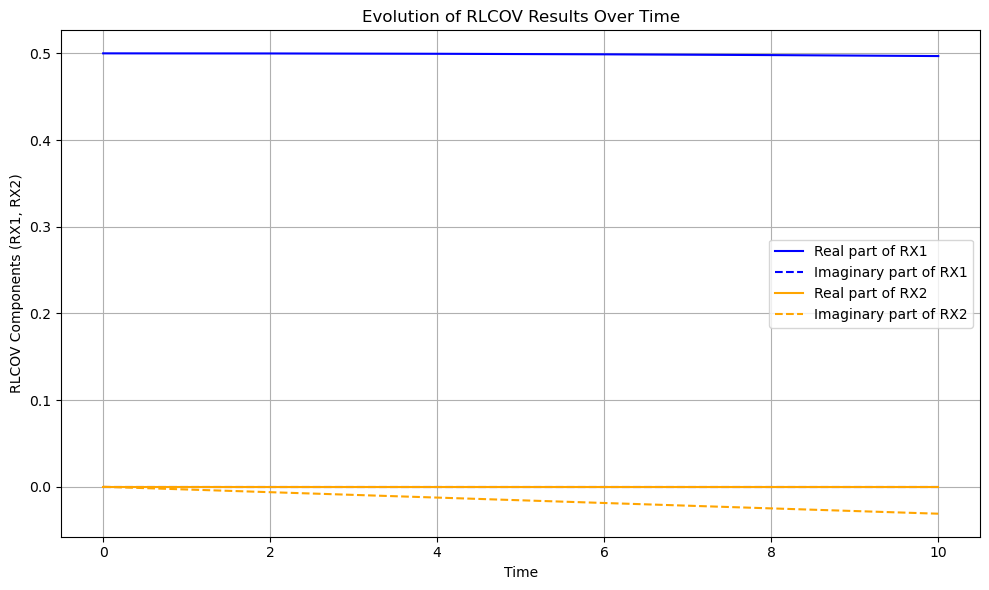

In [41]:
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

# Define the LCOV function to compute y = U^-1 * X
def LCOV(X, U):
    Ui = np.linalg.inv(U)
    return np.dot(Ui, X)

# Define the RLCOV function
def RLCOV(RY, RU):
    # Compute RX = RU * RY
    RX = np.dot(RU, RY)
    return RX

# Define the h3(z) function
def h3(z, h_coeffs):
    z1, z2 = z  # 1D input for fsolve
    h3_z1 = (
        h_coeffs['h130'] * z1**3 +
        h_coeffs['h112'] * z1**2 * z2 +
        h_coeffs['h121'] * z1 * z2**2 +
        h_coeffs['h103'] * z2**3
    )
    h3_z2 = (
        h_coeffs['h230'] * z1**3 +
        h_coeffs['h212'] * z1**2 * z2 +
        h_coeffs['h221'] * z1 * z2**2 +
        h_coeffs['h203'] * z2**3
    )
    return np.array([h3_z1, h3_z2])  # 1D output for fsolve

# Define the system y = z + h3(z)
def system(z_real_imag, y_real_imag, h_coeffs):
    # Reconstruct z as complex numbers
    z = z_real_imag[:2] + 1j * z_real_imag[2:]
    y = y_real_imag[:2] + 1j * y_real_imag[2:]

    # Compute the system in terms of real and imaginary parts
    result = z + h3(z, h_coeffs) - y
    return np.concatenate([result.real, result.imag])  # Return real and imaginary parts as 1D real array

# Compute z_dot (time derivatives of z1 and z2)
def compute_z_dot(t, z):
    z1, z2 = z  # Extract z1 and z2 from the solution
    h3_values = h3([z1, z2], h_coeffs)  # Compute h3(z)
    dz1_dt = 1j * z1 - h3_values[0]
    dz2_dt = -1j * z2 + h3_values[1]
    return [dz1_dt.real, dz2_dt.real]

# Define the RICOV function
def RICOV(t, z):
    z1, z2 = z  # Extract z1 and z2
    h3_values = h3([z1, z2], h_coeffs)  # Compute h3 values
    y10 = z1 + h3_values[0]
    y20 = z2 + h3_values[1]
    return [y10, y20]

# Coefficients for h3(z)
h_coeffs = {
    'h130': -1/48, 'h112': 0,
    'h121': 1/16,  'h103': 1/96,
    'h230': 1/96,  'h212': 1/16,  'h221': 0,
    'h203': -1/48
}

# Compute y as a column vector (2D) from LCOV
X = np.array([[0.5], [0]])  # Column vector
U = (1/np.sqrt(2)) * np.array([[1, 1], [1j, -1j]])
y = LCOV(X, U)  # y is a column vector (complex)

# Flatten y into real and imaginary parts for fsolve
y_real_imag = np.concatenate([y.real.flatten(), y.imag.flatten()])

# Initial guess for z (real and imaginary parts)
z0 = y_real_imag  # Start with real and imaginary parts of y

# Solve for z using fsolve
z_solution_real_imag = fsolve(system, z0, args=(y_real_imag, h_coeffs))

# Reconstruct the complex solution for z
z_solution = z_solution_real_imag[:2] + 1j * z_solution_real_imag[2:]

# Validation: Compute y from z
y_computed = z_solution + h3(z_solution, h_coeffs)

# Solve the system of differential equations using solve_ivp
z_initial = [z_solution[0].real, z_solution[1].real]  # Initial values for z1 and z2
t_span = (0, 10)  # Time span
t_eval = np.linspace(0, 10, 1000)  # Time points for evaluation

# Compute the solution
sol = solve_ivp(compute_z_dot, t_span, z_initial, t_eval=t_eval)

# Use RICOV to compute y10 and y20 for each time step
ricov_results = [RICOV(t, z) for t, z in zip(sol.t, sol.y.T)]

# Apply RLCOV for each RY derived from ricov_results
RU = (1/np.sqrt(2)) * np.array([[1, 1], [1j, -1j]])  # Transformation matrix
rlcov_results = [RLCOV(np.array([y10, y20]), RU) for y10, y20 in ricov_results]

# Display results
print("RICOV computed values (y10 and y20 over time):\n", ricov_results)
print("RLCOV computed values (RX over time):\n", rlcov_results)





import matplotlib.pyplot as plt

# Time points from the solution
time_points = sol.t

# Convert rlcov_results to a 2D NumPy array
rlcov_results_array = np.array(rlcov_results)

# Extract RX components for plotting
rx1 = rlcov_results_array[:, 0]  # First component of RX
rx2 = rlcov_results_array[:, 1]  # Second component of RX

# Plot RX components over time
plt.figure(figsize=(10, 6))

plt.plot(time_points, rx1.real, label='Real part of RX1', color='blue', linestyle='-')
plt.plot(time_points, rx1.imag, label='Imaginary part of RX1', color='blue', linestyle='--')

plt.plot(time_points, rx2.real, label='Real part of RX2', color='orange', linestyle='-')
plt.plot(time_points, rx2.imag, label='Imaginary part of RX2', color='orange', linestyle='--')

# Add labels and legend
plt.title("Evolution of RLCOV Results Over Time")
plt.xlabel("Time")
plt.ylabel("RLCOV Components (RX1, RX2)")
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


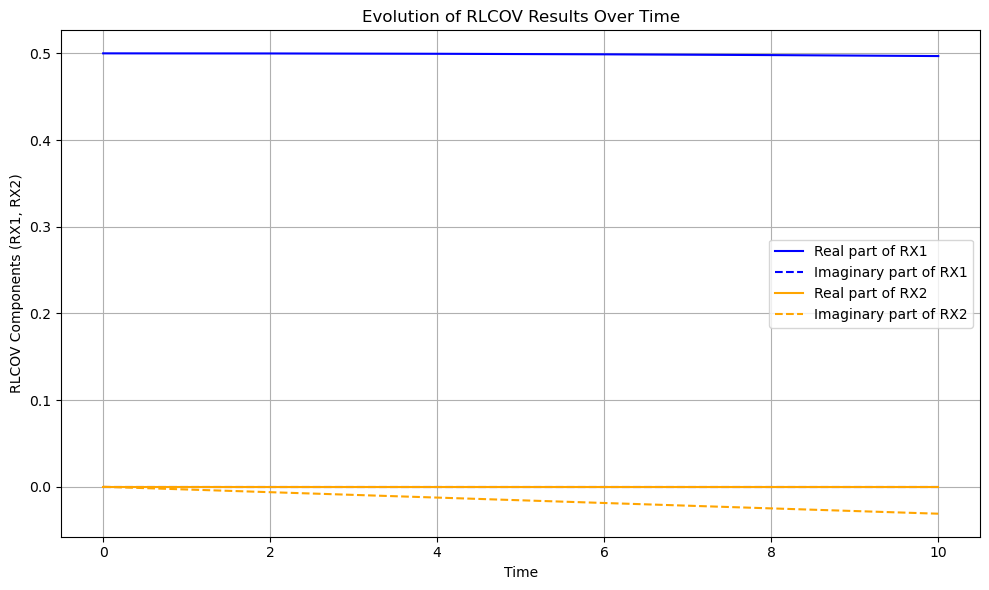

In [40]:
import matplotlib.pyplot as plt

# Time points from the solution
time_points = sol.t

# Convert rlcov_results to a 2D NumPy array
rlcov_results_array = np.array(rlcov_results)

# Extract RX components for plotting
rx1 = rlcov_results_array[:, 0]  # First component of RX
rx2 = rlcov_results_array[:, 1]  # Second component of RX

# Plot RX components over time
plt.figure(figsize=(10, 6))

plt.plot(time_points, rx1.real, label='Real part of RX1', color='blue', linestyle='-')
plt.plot(time_points, rx1.imag, label='Imaginary part of RX1', color='blue', linestyle='--')

plt.plot(time_points, rx2.real, label='Real part of RX2', color='orange', linestyle='-')
plt.plot(time_points, rx2.imag, label='Imaginary part of RX2', color='orange', linestyle='--')

# Add labels and legend
plt.title("Evolution of RLCOV Results Over Time")
plt.xlabel("Time")
plt.ylabel("RLCOV Components (RX1, RX2)")
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()